In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = RandomForestRegressor()

# 2. Setup Pipeline

In [4]:
pca=PCA()
RG = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [6]:
param_grid = {
    "pca__n_components": [5, 45, 100,170],
    "RG__ccp_alpha":[0.005,0.1,0.5,10],
    "RG__n_estimators":[10,100,1000]
    
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__n_estimators': [10, 100, 1000],
                         'pca__n_components': [5, 45, 100, 170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.636):
{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
11,519.208531,50.555150,0.300315,0.248247,0.005,1000,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.583890,-0.563616,...,-0.728874,-0.820420,-0.552395,-0.605927,-0.623791,-0.690166,-0.583210,-0.635638,0.080853,1
7,80.155860,22.114378,0.052716,0.066797,0.005,100,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.594493,-0.576671,...,-0.733915,-0.831336,-0.553255,-0.611484,-0.627748,-0.679150,-0.587576,-0.641259,0.080495,2
3,7.448685,3.993502,0.023622,0.046460,0.005,10,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.649286,-0.569801,...,-0.826138,-0.868996,-0.630575,-0.601541,-0.636149,-0.716808,-0.685974,-0.684930,0.090602,3
9,210.663475,37.935109,0.311384,0.226490,0.005,1000,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.724732,-0.704514,...,-0.924718,-0.975199,-0.724059,-0.693673,-0.750160,-0.798004,-0.743562,-0.785279,0.090450,4
5,27.103136,9.793559,0.053394,0.064566,0.005,100,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.709656,-0.708186,...,-0.896981,-0.984539,-0.706881,-0.737477,-0.758745,-0.786104,-0.769613,-0.785871,0.085706,5
10,371.766533,62.695197,0.225120,0.202942,0.005,1000,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.725060,-0.707980,...,-0.915872,-0.971633,-0.711461,-0.728139,-0.778512,-0.795788,-0.753734,-0.790476,0.084828,6
6,50.214720,23.741474,0.079613,0.081334,0.005,100,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.736163,-0.721917,...,-0.909947,-0.984920,-0.714899,-0.709185,-0.772707,-0.803689,-0.766938,-0.793403,0.085760,7
1,2.479675,1.831886,0.021709,0.040462,0.005,10,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.726156,-0.742606,...,-0.972018,-1.029710,-0.745236,-0.782492,-0.808708,-0.817668,-0.743945,-0.823468,0.098390,8
2,7.465082,2.708325,0.011336,0.006240,0.005,10,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.777829,-0.765752,...,-0.952365,-0.978335,-0.757857,-0.767179,-0.834828,-0.824977,-0.777171,-0.832799,0.077165,9
4,7.405505,3.798144,0.072090,0.082577,0.005,100,5,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.796237,-0.773145,...,-0.960789,-1.021420,-0.803429,-0.754173,-0.762480,-0.874703,-0.833959,-0.845415,0.084079,10


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [13]:
Model_2 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

<ipython-input-15-fbb0627d7471>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG1.fit(PX_train1,Y_train1)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [16]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(RG1.predict(PX_test1),Y_test1)

1.4810879492854574

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

932.00263390991

# 5.1 Model using original sales data

In [21]:
Model_3 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

<ipython-input-24-92233a376675>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG2.fit(PX_train2,Y_train2)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [25]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(RG2.predict(PX_test2),Y_test2)

2819.019700829156

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

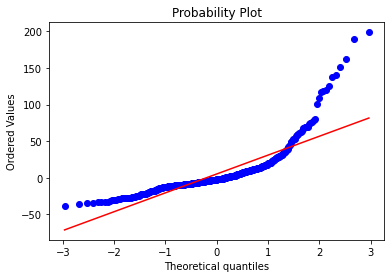

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

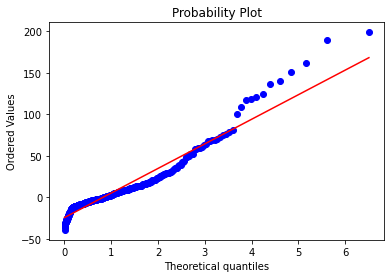

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

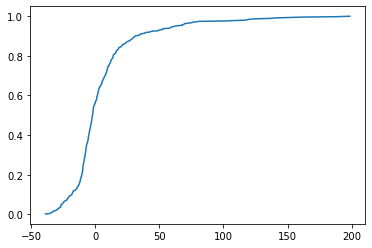

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

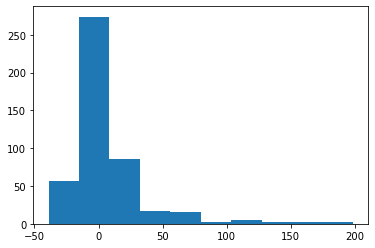

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

5.241865513106607

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

27384.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

29476.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

30228.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4= RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array 

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.296926,0.378116,0.312424,0.267811,0.254714,0.370313,0.193187,0.352212,0.329545,0.288801,0.304405
Exponential,0.330466,0.369719,0.283999,0.289528,0.271313,0.375743,0.212874,0.327667,0.348515,0.333942,0.314376
Empirical,0.337812,0.391550,0.318645,0.293476,0.282756,0.396333,0.228067,0.359757,0.357105,0.339992,0.330549


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,12288.0,17112.0,14464.0,12480.0,12644.0,14460.0,9460.0,16244.0,14732.0,12028.0,13591.2,2135.230423
Exponential,13676.0,16732.0,13148.0,13492.0,13468.0,14672.0,10424.0,15112.0,15580.0,13908.0,14021.2,1606.613382
Empirical,13980.0,17720.0,14752.0,13676.0,14036.0,15476.0,11168.0,16592.0,15964.0,14160.0,14752.4,1721.908197
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2A_Random_forest.csv")